# Gaussian Mixture Model Clustering

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(data=iris['data'], columns=feature_names)
iris_df['target'] = iris['target']

print(iris_df.info())
display(iris_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=3, random_state=0).fit(iris['data'])
gmm_cluster_labels = gmm_model.predict(iris['data'])

iris_df['gmm_cluster'] = gmm_cluster_labels # 실제 정답 레이블과는 전혀 다른 순서

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인 (실제 정답과 매핑은 아님)
iris_result = iris_df.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


## GMM 군집화와 K-Means 군집화 비교

In [17]:
def visualize_cluster_plot(clusterobj, df, label_name, isCenter=True):
    if isCenter:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(df[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False
    
    for label in unique_labels:
        label_cluster = df[df[label_name] == label]
        
        # DBSCAN을 위한 처리 로직
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster' + str(label)
            
        plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if isCenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker="$%d$" % label)
            
    if isNoise:
        legend_loc = 'upper center'
    else:
        legend_loc = 'upper right'
        
    plt.legend(loc=legend_loc)

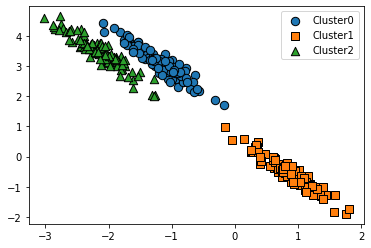

In [18]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터세트, 3개의 cluster, cluster_std=0.5를 만듬
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_aniso = np.dot(x, transformation)

# feature 데이터세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
cluster_df = pd.DataFrame(data=x_aniso, columns=['feature1', 'feature2'])
cluster_df['target'] = y

# 생성된 데이터세트를 target 별로 다른 marker로 표시하여 시각화함
visualize_cluster_plot(None, cluster_df, 'target', isCenter=False)

### K-Means Clustering

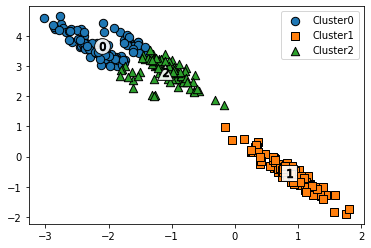

In [19]:
from sklearn.cluster import KMeans

# 3개의 Cluster 기반 KMeans를 x_aniso 데이터세트에 적용
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans_model.fit_predict(x_aniso)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans_model, cluster_df, 'kmeans_label', isCenter=True)

### GMM Clustering

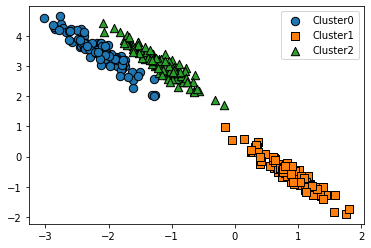

In [20]:
# 3개의 n_componentes기반 GMM을 x_aniso 데이터세트에 적용
gmm_model = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm_model.fit_predict(x_aniso)
cluster_df['gmm_label'] = gmm_label

# GMM은 cluster_centers_ 속성이 없으므로 isCenter를 False로 설정
visualize_cluster_plot(gmm_model, cluster_df, 'gmm_label', isCenter=False)

In [21]:
# K-Means Clustering
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64


In [22]:
# GMM Clustering
print(cluster_df.groupby('target')['gmm_label'].value_counts())

target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
